# Machine Learning
## Cluster Analysis
###### Por: Ricardo Reis

###### Case - Iris


#### Carrega Pacotes

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Para padronização dos dados
from sklearn.preprocessing import StandardScaler

# Dados
from sklearn import datasets

# Algoritmo
from sklearn.cluster import KMeans

# Métrica
from sklearn.metrics import silhouette_score

#### Carrega do Dataset

In [57]:
iris = datasets.load_iris()

In [18]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [58]:
features = pd.DataFrame(data = iris.data, columns = iris.feature_names)
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [59]:
target = pd.DataFrame(iris.target)
target

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


#### Data Prep

##### Renomeando as Colunas

In [60]:
features = features.rename(
    columns = {
        "sepal length (cm)" : "sepal_length",
        "sepal width (cm)" : "sepal_width",
        "petal length (cm)" : "petal_length",
        "petal width (cm)" : "petal_width"
    }
)

##### Verificando Correlação

Deve-se tomar o cuidado de que não hajam grandes correlações entre as variáveis, pois estareamos considerando a mesma informação repetidas vezes, aumentando o "peso" daquela informação na formação dos clusters.

In [61]:
features.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [62]:
features = features.drop(['petal_width','petal_length'], 1)

In [63]:
features.corr()

,sepal_length,sepal_width
sepal_length,1.00000,-0.11757
sepal_width,-0.11757,1.00000


##### Normalizando os Dados

In [87]:
scaler = StandardScaler()
features_scaled = pd.DataFrame(data = scaler.fit_transform(features), columns = features.columns)

#### K-means

In [90]:
withinss = []

for i in range(2, 30):
    
    # Aplicando o k-means dado i de 2 à 30  
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(features_scaled)
    
    # Guardando o SSE
    withinss.append(kmeans.inertia_)

    # Calculando o average silhouette width (ASW)
    silhouette_avg = silhouette_score(features_scaled, kmeans.labels_)
    print("Para n_clusters =", i,"a média do silhouette_score é :", silhouette_avg)

Para n_clusters = 2 a média do silhouette_score é : 0.4478710793867407
Para n_clusters = 3 a média do silhouette_score é : 0.43431274169892686
Para n_clusters = 4 a média do silhouette_score é : 0.39913309001267333
Para n_clusters = 5 a média do silhouette_score é : 0.4010118863224764
Para n_clusters = 6 a média do silhouette_score é : 0.4133893890379682
Para n_clusters = 7 a média do silhouette_score é : 0.3934270254959664
Para n_clusters = 8 a média do silhouette_score é : 0.39723764324388583
Para n_clusters = 9 a média do silhouette_score é : 0.40349559887326125
Para n_clusters = 10 a média do silhouette_score é : 0.40852882488758346
Para n_clusters = 11 a média do silhouette_score é : 0.4173142083746563
Para n_clusters = 12 a média do silhouette_score é : 0.4199042130250207
Para n_clusters = 13 a média do silhouette_score é : 0.41238705701444106
Para n_clusters = 14 a média do silhouette_score é : 0.41849715142290184
Para n_clusters = 15 a média do silhouette_score é : 0.4165122296

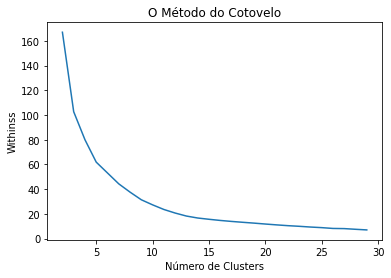

In [91]:
# Plot do within sum of square 
plt.plot(range(2, 30), withinss)
plt.title('O Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Withinss')
plt.show()

In [77]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit(features_scaled)

In [78]:
y_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [73]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Resultado

In [74]:
cores = np.array(['red','green','blue'])

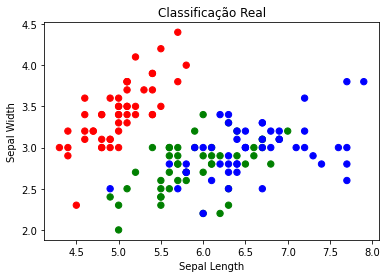

In [75]:
plt.scatter(features.sepal_length, features.sepal_width, c = cores[iris.target], s = 40)
plt.title('Classificação Real')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

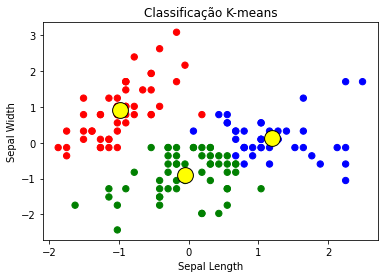

In [101]:
plt.scatter(
    features_scaled.sepal_length, 
    features_scaled.sepal_width,
    c=cores[y_kmeans.labels_],
    s=40
)
plt.scatter(
    y_kmeans.cluster_centers_[:, 0], 
    y_kmeans.cluster_centers_[:, 1],
    s=250, marker='o',
    c='yellow', 
    edgecolor='black'
)
plt.title('Classificação K-means')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [84]:
y_kmeans.cluster_centers_

array([[-0.97822861,  0.90390597],
       [-0.04825457, -0.89526349],
       [ 1.20144049,  0.13569118]])